## california data (linear regression data)

In [1]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [2]:
# logistic과 변수 이름이 겹쳐서 수정 했습니다. prefix 대문자
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(california.data, california.target, test_size = 0.1)

# Linear data 표준화

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic regrssion 용 데이터

In [4]:
#  해당 코드는 수정하지 마세요
from sklearn.datasets import make_classification


X, y = make_classification(n_features=8, n_informative=5,
                           n_redundant=3, n_clusters_per_class=1, random_state=4, n_samples =1000 )

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

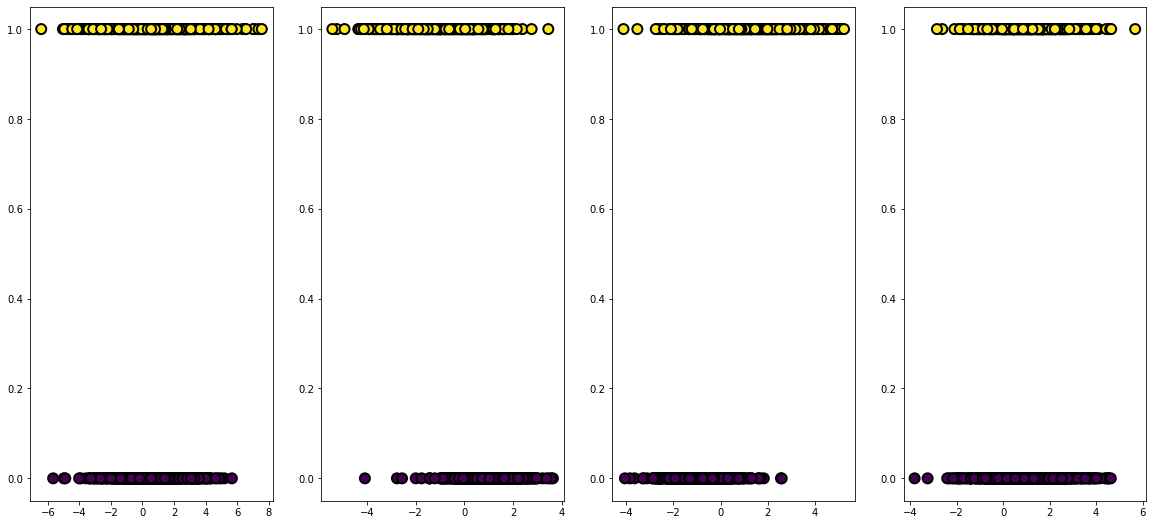

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.subplot(2,4,1)
plt.scatter(x_train[:,0], y_train, marker='o', c=y_train,
    s=100, edgecolor="k", linewidth=2)
plt.subplot(2,4,2)
plt.scatter(x_train[:,1], y_train, marker='o', c=y_train,
    s=100, edgecolor="k", linewidth=2)
plt.subplot(2,4,3)
plt.scatter(x_train[:,2], y_train, marker='o', c=y_train,
    s=100, edgecolor="k", linewidth=2)
plt.subplot(2,4,4)
plt.scatter(x_train[:,3], y_train, marker='o', c=y_train,
    s=100, edgecolor="k", linewidth=2)
plt.show()

# Logistic data 표준화

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 1. Coefficient interpretation(logistic regression)

## A.
### 주어진 데이터의 모든 feature에 대해서 correlation coefficient array를 구하고 이 중 correlation coefficient 가 
### 높은 5개의 feature를 이용해 feature간의 correlation을 heatmap으로 그린다. [5]

In [8]:
import numpy as np
# 대치 행렬
trans_X = np.transpose(X)
# pearson 상관계수 배열 형성
coef_arr = np.corrcoef(trans_X)
# 상위 5개 값 추출
max_val = []
tmp = []
for i in range(0,8):
    tmp = np.sort(coef_arr[i])
    max_val.append(tmp[6])
max_val.sort()
# 상관계수 행렬에서의 위치 찾기 => 제일 관계성을 띄는 5개 feature 알아내기
for i in range(0,8):
    print(np.where(coef_arr == max_val[i]))
# data slicing
trans_X = np.vstack([trans_X[0], trans_X[2], trans_X[3], trans_X[4], trans_X[7]])
coef_arr = np.corrcoef(trans_X)
coef_arr.shape

(array([1], dtype=int32), array([3], dtype=int32))
(array([5, 6], dtype=int32), array([6, 5], dtype=int32))
(array([6], dtype=int32), array([7], dtype=int32))
(array([0, 3], dtype=int32), array([3, 0], dtype=int32))
(array([0, 4], dtype=int32), array([4, 0], dtype=int32))
(array([0, 4], dtype=int32), array([4, 0], dtype=int32))
(array([2, 7], dtype=int32), array([7, 2], dtype=int32))
(array([2, 7], dtype=int32), array([7, 2], dtype=int32))


(5, 5)

###  0,2,3,4,7번 feature가 가장 상관관계 높았다

### heatmap 그리기

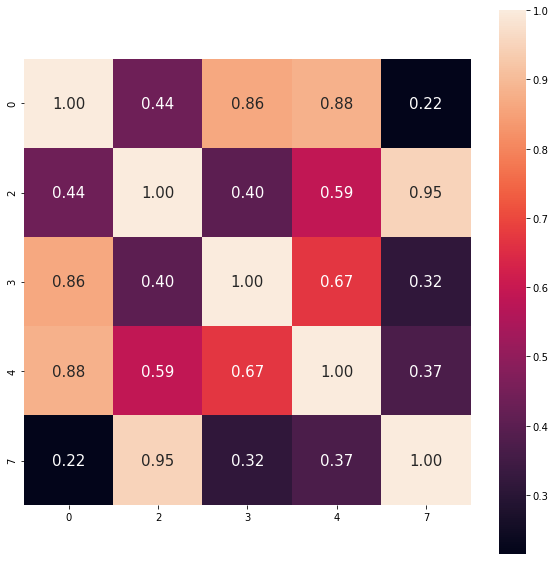

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# graph setting
plt.figure(figsize=(10.0,10.0))
# 5개의 가장 큰 상관관계를가진 feature list
feature_num = [0,2,3,4,7]
# data frame 씌우기
df = pd.DataFrame(coef_arr,columns=feature_num)
# heatmap 그리기
hm =  sns.heatmap(df,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt = '.2f',
                 annot_kws={'size':15},
                 yticklabels=feature_num,
                 xticklabels=feature_num)
plt.show()

### 2번과 7번이 1에 가장 가까우므로 가장 높은 상관관계를 가졌다 

## B.
### 위에서 구한 correlation coefficient array를 바탕으로 
### multiple logistic regression 모델에서 사용할 feature를 정하고 
### 90%의 데이터를 학습데이터로 사용하여 
### regression 모델 학습 후 10% 테스트 데이터에 대한 test acc를 출력한다. [5]

### data 전처리

In [10]:
# 5개 feature를 합치고, label y도 합친다. => training data
train_data = np.vstack([x_train[:,0],x_train[:,2], x_train[:,3],x_train[:,4],x_train[:,7],y_train])
# 전치행렬로 변환
train_data = np.transpose(train_data)
#  5개  feature를 합치고, label y도 합친다. => test data
test_data = np.vstack([x_test[:,0],x_test[:,2],x_test[:,3],x_test[:,4],x_test[:,7],y_test])
# 전치행렬로 변환
test_data = np.transpose(test_data)
# 잘 나왔는지 확인
print(train_data.shape,test_data.shape)

(900, 6) (100, 6)


### Logistic Regression 학습 & 최종 결과 내기

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# 로지스틱 회귀 모델 학습
lr = LogisticRegression(random_state=4)
# 0~4열이 feature 값이고, 5열은 label
lr.fit(train_data[:,:5], train_data[:,5])
# test data에 대해 예측
y_pred = lr.predict(test_data[:,:5])
# 점수 내기
score = accuracy_score(test_data[:,5],y_pred)
print("accuracy는 %.2f 입니다."%score)

accuracy는 0.90 입니다.


#  2. Variable selection (linear regression)

### Linear regression 모델의 variable 선택을 통한 모델을 비교하기 위해서 수업시간에 배운
### Adjusted R^2 을 기반으로 forward selection을 수행한 후 test R^2를 출력하고 x축은 선택한 variable의 개수, 
### y축은 테스트 데이터의 Adjusted R^2과 학습데이터의 Adjusted R^2를 각각 다른 색으로 그래프를 이용해 출력한다.[10]

### forward selection 을 이용하여 variable을 4개 까지 선택한다. (for 문 이용)

###  sklearn의 r2_score 함수에 기반하여 Adjusted R^2를 만든다. 

In [12]:
### reference
'''
single feature 일 때,
이제 reshape() 의 행(row) 차원 위치에 '-1'을 넣으면 어떻게 재구조화가 되는지 살펴보겠습니다. 
총 12개의 원소가 들어있는 배열 x에 대해서 x.reshape(-1, 정수) 를 해주면 
'열(column)' 차원의 '정수'에 따라서 12개의 원소가 빠짐없이 배치될 수 있도록
'-1'이 들어가 있는 '행(row)' 의 개수가 가변적으로 정해짐을 알 수 있습니다.  
'''

"\nsingle feature 일 때,\n이제 reshape() 의 행(row) 차원 위치에 '-1'을 넣으면 어떻게 재구조화가 되는지 살펴보겠습니다. \n총 12개의 원소가 들어있는 배열 x에 대해서 x.reshape(-1, 정수) 를 해주면 \n'열(column)' 차원의 '정수'에 따라서 12개의 원소가 빠짐없이 배치될 수 있도록\n'-1'이 들어가 있는 '행(row)' 의 개수가 가변적으로 정해짐을 알 수 있습니다.  \n"

### Fomula : Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)

-------------------------------select one feature-----------------------------------------
train_adj
[0.47625589340757246]
test_adj
[0.44700360154875296]
selected feature
[0]
-------------------------------select two feature-----------------------------------------
train 데이터 모양 test 데이터 모양
(18576, 2) (2064, 2)
train_adj
[0.47625589340757246, 0.5114163968218856]
test_adj
[0.44700360154875296, 0.43070625747371516]
selected feature
[0, 1]
-------------------------------select three feature-----------------------------------------
train 데이터 모양 test 데이터 모양
(18576, 3) (2064, 3)
train_adj
[0.47625589340757246, 0.5114163968218856, 0.5192458957843074]
test_adj
[0.44700360154875296, 0.43070625747371516, 0.4901383920586405]
selected feature
[0, 1, 6]
-------------------------------select four feature-----------------------------------------
train 데이터 모양 test 데이터 모양
(18576, 4) (2064, 4)
train_adj
[0.47625589340757246, 0.5114163968218856, 0.5192458957843074, 0.5958937545834093]
test_adj
[0.44700360

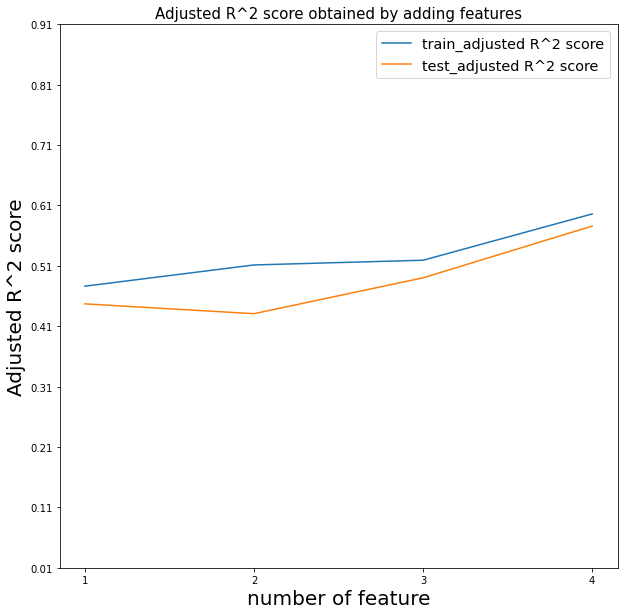

In [18]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# graph setting
plt.figure(figsize=(10.0,10.0))
# title
plt.title('Adjusted R^2 score obtained by adding features',fontsize='15')
# plt의 x 축
plt.xlabel('number of feature',fontsize='20')
# plt의 y 축
plt.ylabel('Adjusted R^2 score',fontsize='20')
# data Area
# number of feature => len(california.feature_names)
# number of data => len(california.data)
# california.data.shape[1] => 열의 갯수
n_feature = len(california.feature_names)
n_samples =  len(california.data)

# Make adj R2 score
def ar2_score(y_test, y_pred, p):
    r2 = r2_score(y_test,y_pred)
    result = 1 - (1 - r2)*(n_samples-1)/(n_samples-p-1)
    return result

# Linear Regression을 학습하고, adj r2 score를 결과로 돌려주는 함수
def estimator(x_train, y_train,x_test,y_test, p):
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    result = ar2_score(y_test,y_pred,p)
    return result

# training data feature selection
train_subset = []
# training data adj r2 score
train_adj = []
# test data adj r2 score
test_adj = []

# 부분 집합 구성 함수
def train_forward_selection(data,p):
    mf = -2
    max_index = -1
    # 처음 feautrue 뽑는 로직
    if p == 1:
        for feature in range(0,n_feature):
            result = estimator(X_train[:,feature].reshape(-1, 1),Y_train,X_train[:,feature].reshape(-1, 1),Y_train,1)
            if mf < result:
                mf = result
                max_index = feature
        train_adj.append(mf)
        train_subset.append(max_index)
    # 두번 째 부터 feature 뽑는 로직
    else:
        for feature in range(0,n_feature):
            if feature in train_subset:   continue
            tmp = np.hstack([data,X_train[:,feature].reshape(-1, 1)])
            result = estimator(tmp,Y_train,tmp,Y_train,p)
            if mf < result:
                mf = result
                max_index = feature
        train_adj.append(mf)
        train_subset.append(max_index)
        return tmp;
        
print('-------------------------------select one feature-----------------------------------------')
# 첫 번째 feature 선택
data = 0
train_forward_selection(data,1)
# test data의 adj r2 구한다
result = estimator(X_train[:,train_subset[0]].reshape(-1, 1),Y_train,X_test[:,train_subset[0]].reshape(-1, 1),Y_test,1)
test_adj.append(result)
print('train_adj')
print(train_adj)
print('test_adj')
print(test_adj)
print('selected feature')
print(train_subset)
print('-------------------------------select two feature-----------------------------------------')
# 첫 번째 feature 포함, 두 번째 feature 선택
concat_data = train_forward_selection(X_train[:,train_subset[0]].reshape(-1, 1),2)
# test data의 adj r2 구한다
test_data = np.hstack([X_test[:,train_subset[0]].reshape(-1, 1),X_test[:,train_subset[1]].reshape(-1, 1)])
print('train 데이터 모양', 'test 데이터 모양')
print(concat_data.shape, test_data.shape)
result = estimator(concat_data,Y_train,test_data,Y_test,2)
test_adj.append(result)
print('train_adj')
print(train_adj)
print('test_adj')
print(test_adj)
print('selected feature')
print(train_subset)
print('-------------------------------select three feature-----------------------------------------')
# 첫 번째 feature, 두 번째 feature 포함 세 번째 feature 선택
data = np.hstack([X_train[:,train_subset[0]].reshape(-1, 1),X_train[:,train_subset[1]].reshape(-1, 1)])
concat_data = train_forward_selection(data,3)

# test data의 adj r2 구한다
test_data = np.hstack([test_data,X_test[:,train_subset[2]].reshape(-1, 1)])
print('train 데이터 모양', 'test 데이터 모양')
print(concat_data.shape, test_data.shape)
result = estimator(concat_data,Y_train,test_data,Y_test,3)
test_adj.append(result)
print('train_adj')
print(train_adj)
print('test_adj')
print(test_adj)
print('selected feature')
print(train_subset)
print('-------------------------------select four feature-----------------------------------------')
# 첫 번째 feature, 두 번째 feature, 세 번째 feature 포함 네 번째 feature 선택
data = np.hstack([data,X_train[:,train_subset[2]].reshape(-1, 1)])
concat_data = train_forward_selection(data,4)

# test data의 adj r2 구한다
test_data = np.hstack([test_data,X_test[:,train_subset[3]].reshape(-1, 1)])
print('train 데이터 모양', 'test 데이터 모양')
print(concat_data.shape, test_data.shape)
result = estimator(concat_data,Y_train,test_data,Y_test,4)
test_adj.append(result)
print('train_adj')
print(train_adj)
print('test_adj')
print(test_adj)
print('selected feature')
print(train_subset)

# graph setting
plt.plot([i for i in range(1,5)],train_adj,label='train_adjusted R^2 score')
plt.plot([i for i in range(1,5)],test_adj,label='test_adjusted R^2 score')
plt.legend(loc='upper right',fontsize='x-large')
x_bins = np.arange(1,5,step=1)
plt.xticks(x_bins)
y_bins = np.arange(0.01,1.01,step=0.1)
plt.yticks(y_bins)
plt.show()

# 3.Regularized linear model (linear regression)

### Regularization 방법 중 하나인 lasso regression을 이용하여 5-fold cross validation을 통해 
### 최적 하이퍼파라미터 탐색 후, 최종 모델의 test R^2를 출력한다. [10]

In [14]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

# pipeline 생성 데이터를 정규화 시키고, 학습시킬 알고리즘으로 LASSO
pipe_svc = Pipeline([('scl', StandardScaler()),('lasso',Lasso(random_state=4))])
# LASSO의 Penalty 강도 => log scale
alpha_set = [1e-3,1e-2,1e-1,1e1,1e2,1e3]
# 최소를 찾아가는 반복 횟수
max_iter_set = [1e6, 1e7, 1e8, 1e9,1e10]
# 하이퍼 파라미터 후보
param_grid = [
    {'lasso__alpha':alpha_set, 'lasso__max_iter':max_iter_set}]
# 5-fold 그리드 서치 진행
grid = GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring='r2', cv=5, n_jobs = -1)
grid.fit(X_train, Y_train)
best_params = grid.best_params_
# 최고의  하이퍼 파라미터 조합 출력
print(best_params)

{'lasso__alpha': 0.01, 'lasso__max_iter': 1000000.0}


In [15]:
# 최고의 하이퍼 파라미터 기반으로 만들어진 모델로 최종 모델 test R^2 출력
best_LASSO=grid.best_estimator_
Y_pred = best_LASSO.predict(X_test)
score = r2_score(Y_test,Y_pred)
print("R2 SCORE 는 %2.3f 입니다"%score)

R2 SCORE 는 0.585 입니다
